# Sentiment Analysis con KNN
## Clasificador en C++ 💪💪
Vamos a probar a nuestro bichito


Definir los path al ejecutable de python 3.6 y sus librerías,
de acuerdo al virtual env que estén corriendo.

In [7]:
!cd .. && git submodule init
!cd .. && git submodule update
!cd .. && mkdir build
!cd ../build/ && rm -rf *
!cd ../build && cmake \
  -DPYTHON_EXECUTABLE="$(which python)" \
  -DCMAKE_BUILD_TYPE=Release ..
!cd ../build && make install

mkdir: cannot create directory ‘build’: File exists
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
Release mode
-- Found PythonInterp: /mnt/d/001.Maca/Metnum/TP2/tp2/bin/python (found version "3.6.8") 
-- Found PythonLibs: /usr/lib/x86_64-linux-gnu/libpython3.6m.so
-- pybind11 v2.3.dev0
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- LTO enabled
CMAKE_INSTALL_PREFIX=/mnt/d/001.Maca/Metnum/TP2
-- Configuring done
-- Generating do

In [3]:
# Verifico la correcta instalación. Si no falla el import está OK
!pwd
!python --version
import sentiment


/mnt/d/001.Maca/Metnum/TP2/notebooks
Python 3.6.8


In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd

!cd ../data && tar -xvf *.tgz
!cd ../data && tar -xvf *.tar.gz

df = pd.read_csv("../data/imdb_small.csv", index_col=0)

print("Cantidad de documentos: {}".format(df.shape[0]))

tar: *.tgz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
tar: *.tar.gz: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now
Cantidad de documentos: 12500


In [5]:
df.describe()

,type,review,label,file
count,12500,12500,12500,12500
unique,2,12469,2,12085
top,test,"I have always been a fan of Bottom, grabbing a...",neg,8959_1.txt
freq,6275,2,6322,2


In [6]:
text_train = (df[df.type == 'train']["review"])[:1000]
label_train = (df[df.type == 'train']["label"])[:1000]

text_test = (df[df.type == 'test']["review"])[:500]
label_test = (df[df.type == 'test']["label"])[:500]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))


Cantidad de instancias de entrenamiento = 1000
Cantidad de instancias de test = 500


In [6]:
print("Class balance : {} pos {} neg".format(
    (label_train == 'pos').sum() / label_train.shape[0], 
    (label_train == 'neg').sum() / label_train.shape[0]
))

Class balance : 0.512 pos 0.488 neg


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)

vectorizer.fit(text_train)

X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

In [9]:
import sentiment

clf = sentiment.KNNClassifier(100)

clf.fit(X_train, y_train)


In [10]:
%%time
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Accuracy: {}".format(acc))

Accuracy: 0.57
CPU times: user 7.92 s, sys: 12.5 s, total: 20.4 s
Wall time: 20.4 s


In [1]:
import matplotlib.pyplot as plt
import sentiment
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
df = pd.read_csv("../data/imdb_small.csv", index_col=0)

Cantidad de instancias de entrenamiento = 100
Cantidad de instancias de test = 100
Accuracy: [0.59]
Cantidad de instancias de entrenamiento = 200
Cantidad de instancias de test = 100
Accuracy: [0.59, 0.45]
Cantidad de instancias de entrenamiento = 300
Cantidad de instancias de test = 100
Accuracy: [0.59, 0.45, 0.56]


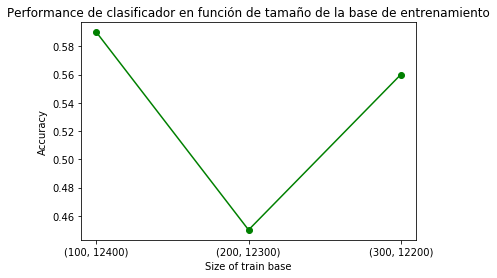

In [10]:
# TEST DE TAMAÑO DE INSTANCIAS DE ENTRENAMIENTO vs TEST. (SIN PCA)

res1 = []
division = list(range(3113,9338,3112)) #Mas o menos 1/4, 1/2, 3/4 de la base se usan para train
#Para debug descomentar la prox y comentar la anterior:
#division = list(range(100,301,100))
rangos = [(x,12500-x) for x in division]
acc = []
i = 0
for n in division:
    #Divido train y test
    text_train = df[:n]["review"]
    label_train = df[:n]["label"]
    text_test = df[n+1:]["review"]
    label_test = df[n+1:]["label"]
    print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
    print("Cantidad de instancias de test = {}".format(len(text_test)))
    #Hago BoW
    vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
    vectorizer.fit(text_train)
    #Aplico PCA
    X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
    X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values
    #Aplico KNN
    clf = sentiment.KNNClassifier(100)
    clf.fit(X_train, y_train)
    #Predigo
    y_pred = clf.predict(X_test)
    #Calculo accuracy y guardo resultado
    acc.append(accuracy_score(y_test, y_pred))
    print("Accuracy: {}".format(acc))
    i+=1

plt.plot(division, acc, 'g-o')
plt.xlabel("Size of train base")
plt.ylabel("Accuracy")
plt.xticks(division, rangos)
plt.title("Performance de clasificador en función de tamaño de la base de entrenamiento");

In [ ]:
# TEST DE CAMBIO DE N_NEIGHBORS (SOLO KNN)
#Temporal cambiar 100 a 6225 y sacar limite superior test
text_train = df[:6225]["review"]
label_train = df[:6225]["label"]

text_test = df[6225:]["review"]
label_test = df[6225:]["label"]

print("Cantidad de instancias de entrenamiento = {}".format(len(text_train)))
print("Cantidad de instancias de test = {}".format(len(text_test)))

vectorizer = CountVectorizer(max_df=0.90, min_df=0.01, max_features=5000)
vectorizer.fit(text_train)
X_train, y_train = vectorizer.transform(text_train), (label_train == 'pos').values
X_test, y_test = vectorizer.transform(text_test), (label_test == 'pos').values

i = 0
acc = []
neighs = list(range(25,201,25))
for n in neighs:
    clf = sentiment.KNNClassifier(n)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc.append(accuracy_score(y_test, y_pred))
    print("Accuracy {}: {}".format(n,acc))
    i+=1
    
plt.plot(neighs, acc, 'g-o')
plt.xlabel("Vecinos")
plt.ylabel("Accuracy")
plt.xticks(neighs)
plt.title("Performance de clasificador en función a cantidad de vecinos");

Cantidad de instancias de entrenamiento = 6225
Cantidad de instancias de test = 6275
